# EDA & SWOT Analysis for Nykaa Cosmetics Retailer
* This notebook explores strategic insights through exploratory data analysis (EDA) and SWOT analysis using datasets from product, feedback, inventory, and customer transactions.

## EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})

# Load CSVs
customers     = pd.read_csv("C:/Users/AARTHI/Downloads/BIBA_Glow&Shimmer/BIBA_Glow&Shimmer/customers.csv")
products      = pd.read_csv("C:/Users/AARTHI/Downloads/BIBA_Glow&Shimmer/BIBA_Glow&Shimmer/products.csv")
transactions  = pd.read_csv("C:/Users/AARTHI/Downloads/BIBA_Glow&Shimmer/BIBA_Glow&Shimmer/transactions.csv")
feedback      = pd.read_csv("C:/Users/AARTHI/Downloads/BIBA_Glow&Shimmer/BIBA_Glow&Shimmer/feedback-2.csv")
inventory     = pd.read_csv("C:/Users/AARTHI/Downloads/BIBA_Glow&Shimmer/BIBA_Glow&Shimmer/inventory.csv")

# Merge all data into unified dataframe
df = transactions.merge(products, on='product_id', how='left')\
                 .merge(feedback, on='product_id', how='left')\
                 .merge(inventory, on='product_id', how='left')

# Summary of dimensions and data
print(customers.shape, products.shape, transactions.shape, feedback.shape, inventory.shape)
print(df.info())
print(df.describe())


(1000, 12) (1000, 9) (1000, 9) (1000, 7) (1000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     1859 non-null   int64  
 1   customer_id_x      1859 non-null   int64  
 2   product_id         1859 non-null   int64  
 3   purchase_date      1859 non-null   object 
 4   quantity           1859 non-null   int64  
 5   unit_price         1859 non-null   float64
 6   total_amount       1859 non-null   float64
 7   payment_mode       1859 non-null   object 
 8   discount_applied   1859 non-null   float64
 9   product_name       1859 non-null   object 
 10  brand              1859 non-null   object 
 11  category           1859 non-null   object 
 12  sub_category       1859 non-null   object 
 13  price              1859 non-null   float64
 14  stock_quantity     1859 non-null   int64  
 15  is_active          18

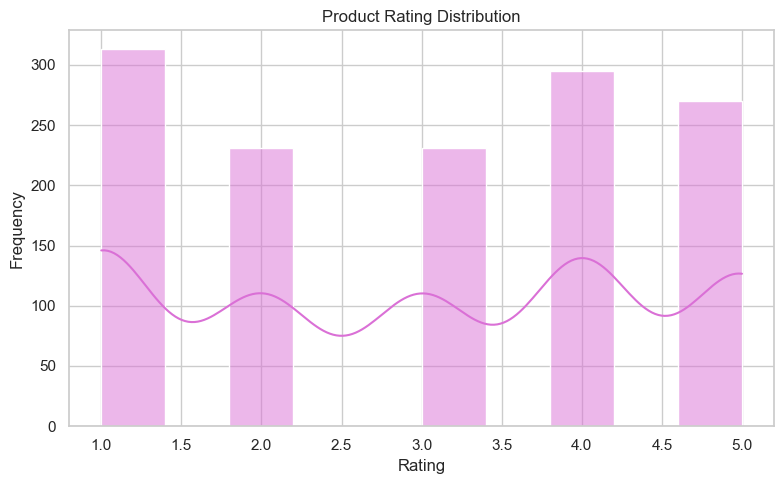

C:\Users\AARTHI\AppData\Local\Temp\ipykernel_32016\1479537024.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette="Set2")


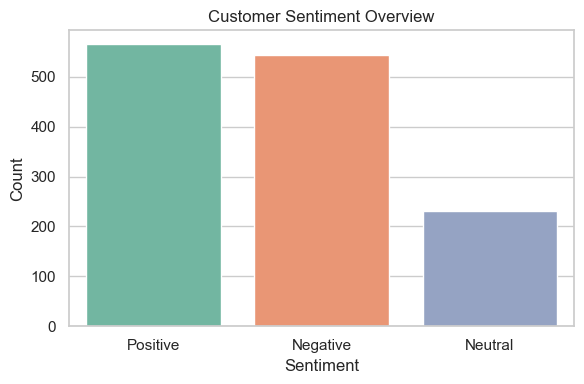

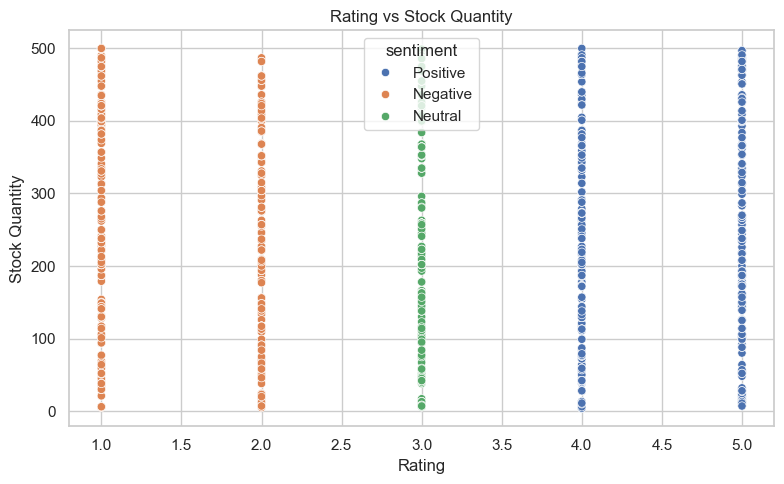

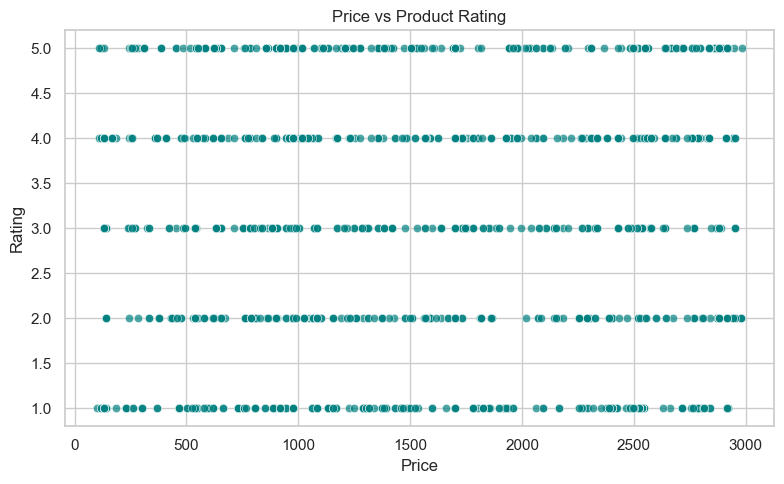

In [4]:
# Product Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True, color="orchid")
plt.title("Product Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Sentiment Breakdown
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette="Set2")
plt.title("Customer Sentiment Overview")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Rating vs Stock Quantity
plt.figure(figsize=(8,5))
sns.scatterplot(x='rating', y='stock_quantity', hue='sentiment', data=df)
plt.title("Rating vs Stock Quantity")
plt.xlabel("Rating")
plt.ylabel("Stock Quantity")
plt.show()

# Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='price', y='rating', data=df, alpha=0.7, color='teal')
plt.title("Price vs Product Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()








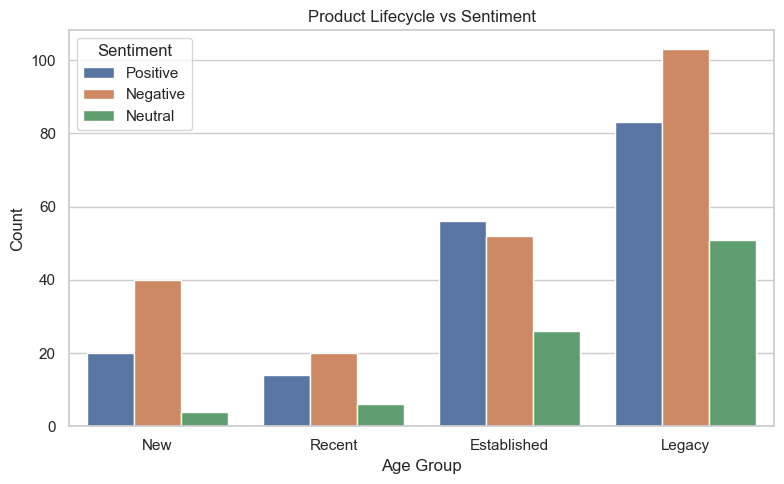

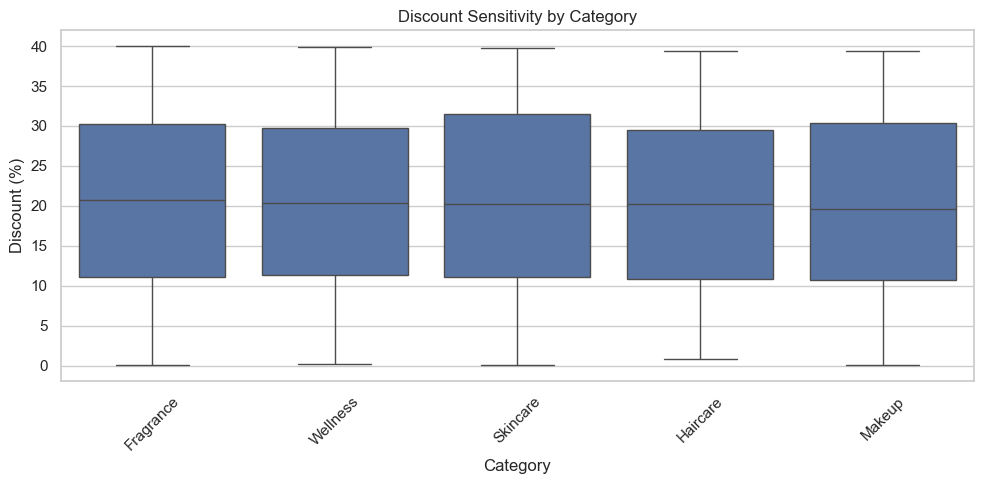

C:\Users\AARTHI\AppData\Local\Temp\ipykernel_32016\1138028335.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_mode', data=df, palette="Set2")


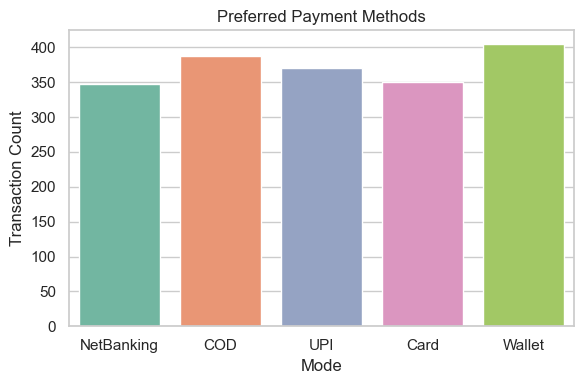

In [5]:
# Product Lifecycle vs Sentiment
df['date_added'] = pd.to_datetime(df['date_added'])
df['age_days'] = (pd.Timestamp.now() - df['date_added']).dt.days
df['age_group'] = pd.cut(df['age_days'], bins=[0,90,180,365,730], labels=['New','Recent','Established','Legacy'])
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='sentiment', data=df)
plt.title("Product Lifecycle vs Sentiment")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

# Discount Sensitivity by Category
plt.figure(figsize=(10,5))
sns.boxplot(x='category', y='discount_applied', data=df)
plt.title("Discount Sensitivity by Category")
plt.xlabel("Category")
plt.ylabel("Discount (%)")
plt.xticks(rotation=45)
plt.show()

# Payment Mode Preferences (Bar)
plt.figure(figsize=(6,4))
sns.countplot(x='payment_mode', data=df, palette="Set2")
plt.title("Preferred Payment Methods")
plt.xlabel("Mode")
plt.ylabel("Transaction Count")
plt.show()

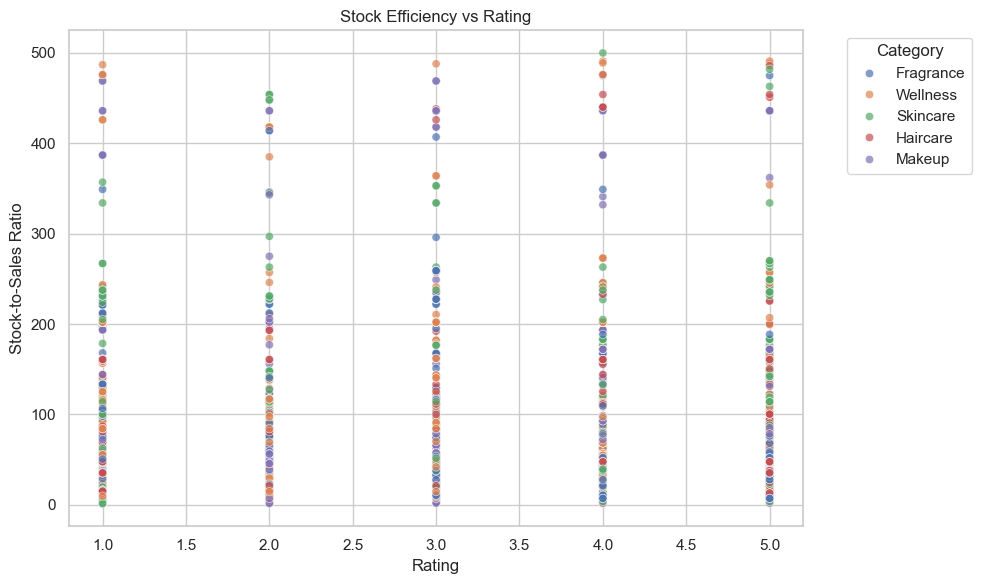

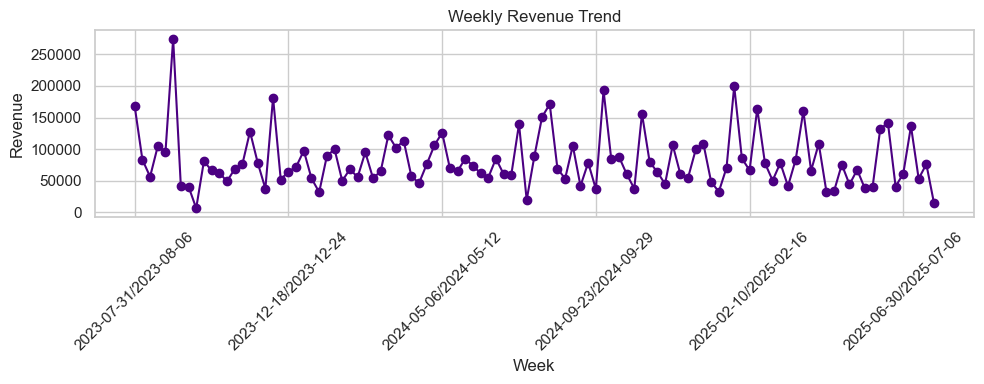

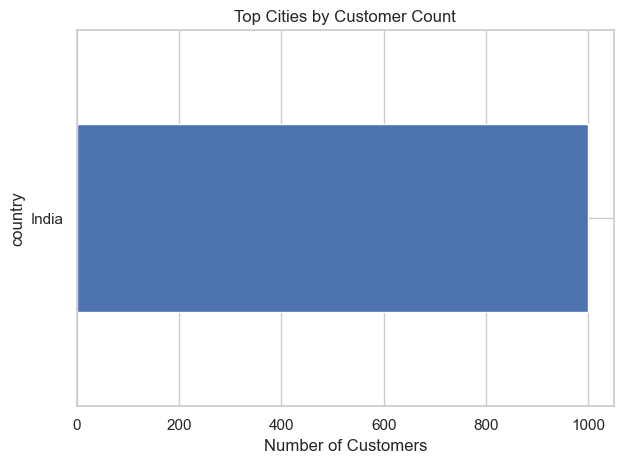

In [6]:
# Stock-to-Sales Efficiency
df['stock_to_sales_ratio'] = df['stock_quantity'] / df['quantity']
plt.figure(figsize=(10,6))
sns.scatterplot(x='rating', y='stock_to_sales_ratio', hue='category', alpha=0.7, data=df)
plt.title("Stock Efficiency vs Rating")
plt.xlabel("Rating")
plt.ylabel("Stock-to-Sales Ratio")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Weekly Revenue Trend
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
weekly_rev = df.groupby(df['purchase_date'].dt.to_period('W'))['total_amount'].sum()
weekly_rev.index = weekly_rev.index.astype(str)
plt.figure(figsize=(10,4))
weekly_rev.plot(marker='o', color='indigo')
plt.title("Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Top country by Customer Count
top_cities = customers['country'].value_counts().head(10)
top_cities.plot(kind='barh', title='Top Cities by Customer Count')
plt.xlabel('Number of Customers')
plt.gca().invert_yaxis()
plt.show()


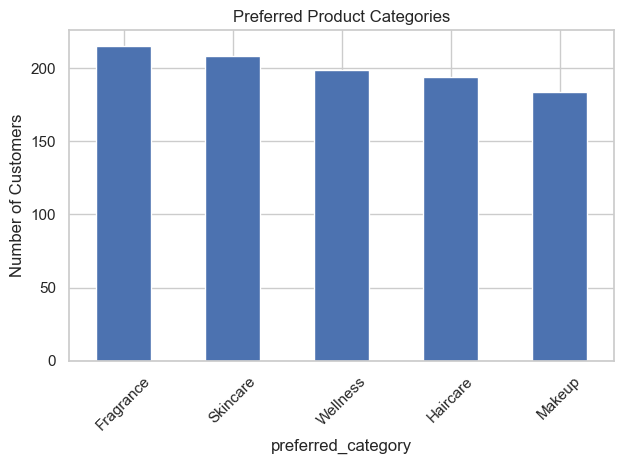

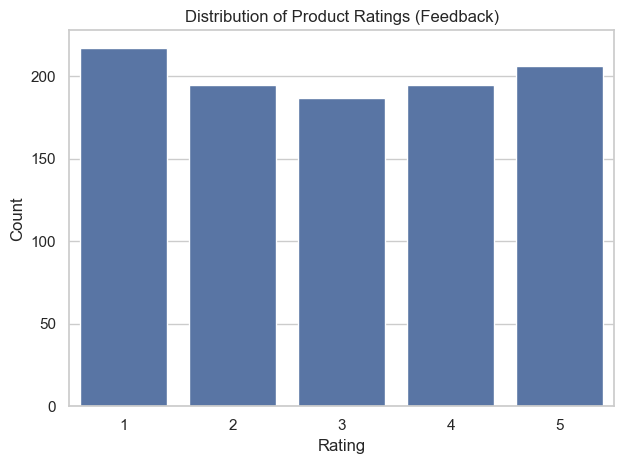

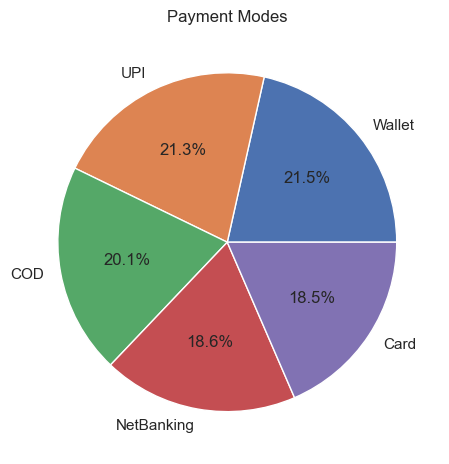

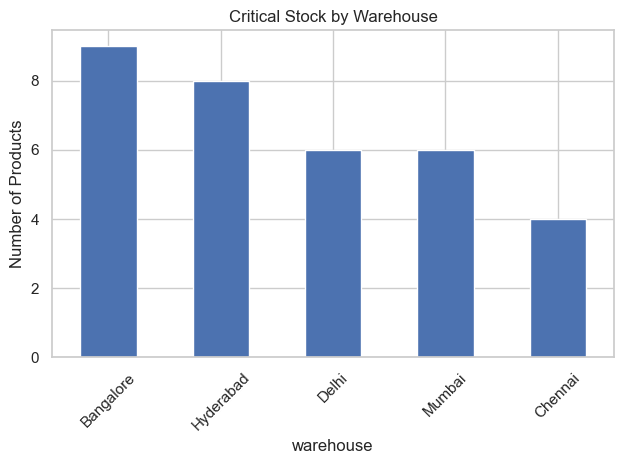

In [7]:
# Preferred Product Categories
customers['preferred_category'].value_counts().plot(kind='bar', title='Preferred Product Categories')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Rating Distribution from Feedback
sns.countplot(x='rating', data=feedback)
plt.title('Distribution of Product Ratings (Feedback)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Payment Mode Breakdown (Pie)
transactions['payment_mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Payment Modes')
plt.ylabel('')
plt.show()

# Critical Stock by Warehouse
critical_stock = inventory[inventory['is_critical_stock'] == True]
critical_stock['warehouse'].value_counts().plot(kind='bar', title='Critical Stock by Warehouse')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

## SWOT Analysis

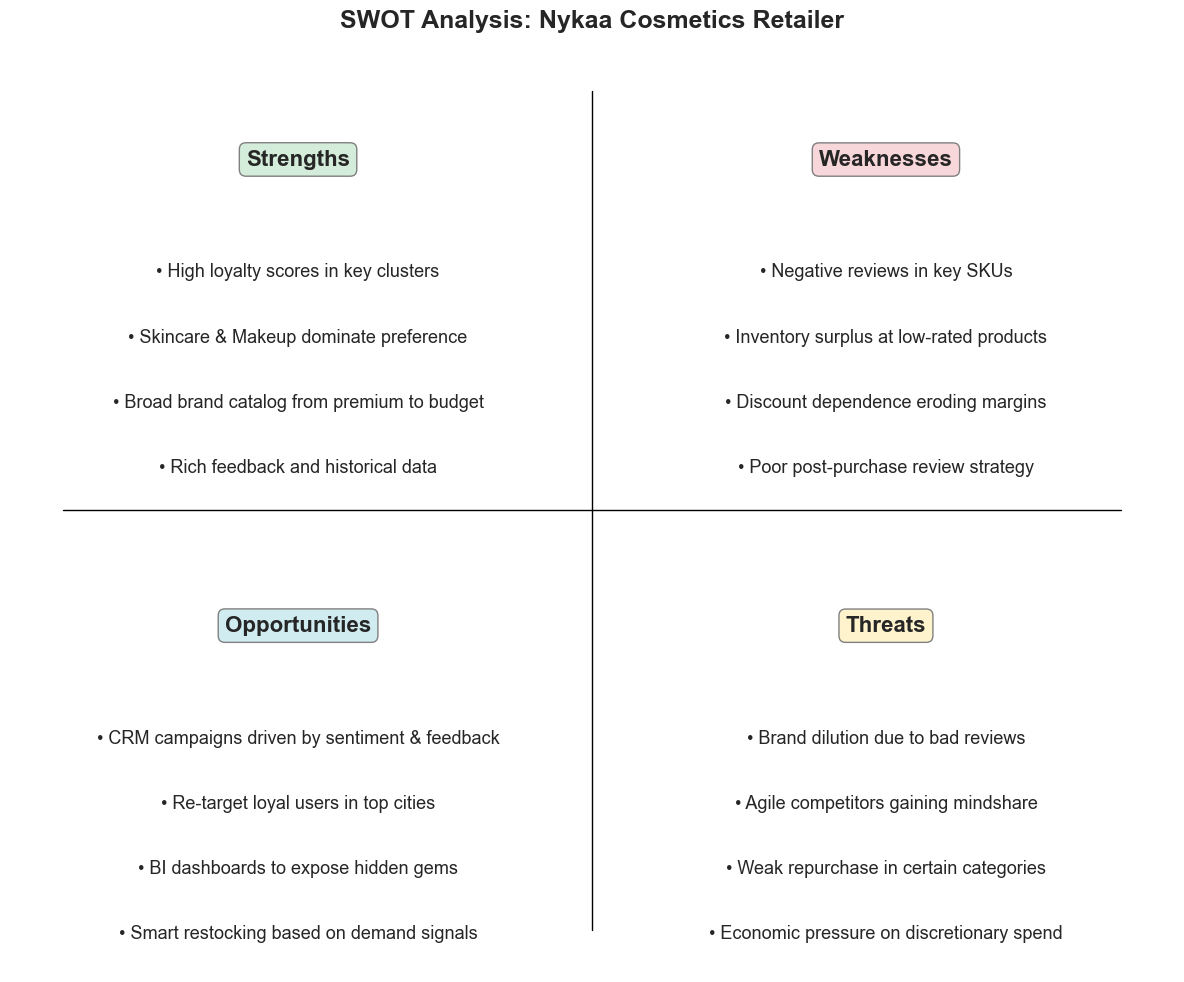

In [9]:
import matplotlib.pyplot as plt

# Define SWOT content
swot = {
    'Strengths': [
        "High loyalty scores in key clusters",
        "Skincare & Makeup dominate preference",
        "Broad brand catalog from premium to budget",
        "Rich feedback and historical data"
    ],
    'Weaknesses': [
        "Negative reviews in key SKUs",
        "Inventory surplus at low-rated products",
        "Discount dependence eroding margins",
        "Poor post-purchase review strategy"
    ],
    'Opportunities': [
        "CRM campaigns driven by sentiment & feedback",
        "Re-target loyal users in top cities",
        "BI dashboards to expose hidden gems",
        "Smart restocking based on demand signals"
    ],
    'Threats': [
        "Brand dilution due to bad reviews",
        "Agile competitors gaining mindshare",
        "Weak repurchase in certain categories",
        "Economic pressure on discretionary spend"
    ]
}

# Create figure canvas
fig, ax = plt.subplots(figsize=(12, 10))
plt.axis('off')

# Define quadrant centers
quadrants = {
    'Strengths':    (0.25, 0.75),
    'Weaknesses':   (0.75, 0.75),
    'Opportunities':(0.25, 0.25),
    'Threats':      (0.75, 0.25),
}

# Background color per quadrant
colors = {
    'Strengths': '#D4EDDA',
    'Weaknesses': '#F8D7DA',
    'Opportunities': '#D1ECF1',
    'Threats': '#FFF3CD',
}

# Text size and spacing
title_size = 16
text_size = 13
line_spacing = 0.07

# Render each quadrant
for label, (x, y) in quadrants.items():
    ax.text(x, y + 0.12, label, fontsize=title_size, fontweight='bold', ha='center',
            bbox=dict(boxstyle='round', facecolor=colors[label], edgecolor='gray'))

    for i, point in enumerate(swot[label]):
        ax.text(x, y - i * line_spacing, f"• {point}", fontsize=text_size, ha='center')

# Draw cross lines
ax.plot([0.5, 0.5], [0.05, 0.95], color='black', linewidth=1)
ax.plot([0.05, 0.95], [0.5, 0.5], color='black', linewidth=1)

# Title
plt.suptitle("SWOT Analysis: Nykaa Cosmetics Retailer", fontsize=18, fontweight='bold')

plt.show()